In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'C:\\Users\\Administrator\\Desktop\\FinalProject\\merged_dataset_with_year.csv'
data = pd.read_csv(file_path)

missing_values = data.isnull().sum()
data_types = data.dtypes

data['PRIMARY INDUSTRY ACTIVITY DESCRIPTION'].fillna('Unknown', inplace=True)
data['ACTIVITY DESCRIPTION'].fillna('Unknown', inplace=True)

data['PNEC (??g/L)'].fillna(data['PNEC (??g/L)'].mean(), inplace=True)
data['REGION'].fillna('Unknown', inplace=True)

data['EASTING'].fillna(data['EASTING'].median(), inplace=True)
data['NORTHING'].fillna(data['NORTHING'].median(), inplace=True)

data.drop(columns=['EA AREA NAME LABEL', 'ROUTE NAME LABEL', 'REGULATED INDUSTRY SECTOR LABEL',
                   'REGULATED INDUSTRY SUB SECTOR LABEL'], inplace=True)

missing_values_after_cleanup = data.isnull().sum()


KeyError: 'PRIMARY INDUSTRY ACTIVITY DESCRIPTION'

In [10]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

combined_data = pd.read_csv('C:\\Users\\Administrator\\Desktop\\FinalProject\\combined_pollution_data.csv')

combined_data.head()

pollutants_data = combined_data[['SUBSTANCE NAME', 'Year', 'QUANTITY RELEASED (kg)']]

pollutants_data.head()


,SUBSTANCE NAME,Year,QUANTITY RELEASED (kg)
0,Fluoranthene,2016,0.13
1,Fluoranthene,2016,0.22
2,Fluoranthene,2016,0.29
3,Fluoranthene,2016,0.52
4,Fluoranthene,2016,0.53


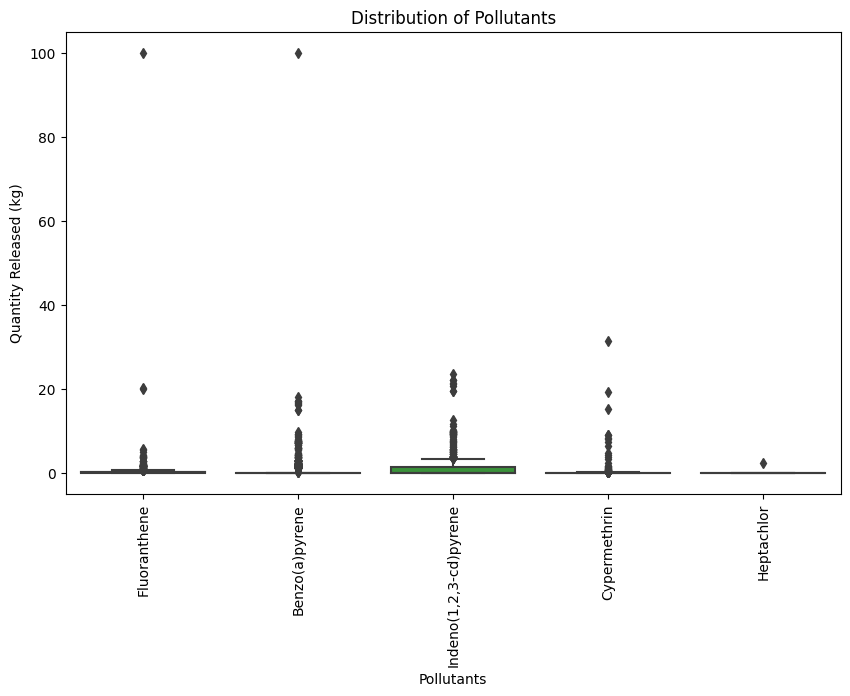

In [11]:
# Visualize results
plt.figure(figsize=(10, 6))
sns.boxplot(x='SUBSTANCE NAME', y='QUANTITY RELEASED (kg)', data=pollutants_data)
plt.title('Distribution of Pollutants')
plt.xlabel('Pollutants')
plt.ylabel('Quantity Released (kg)')
plt.xticks(rotation=90)
plt.show()


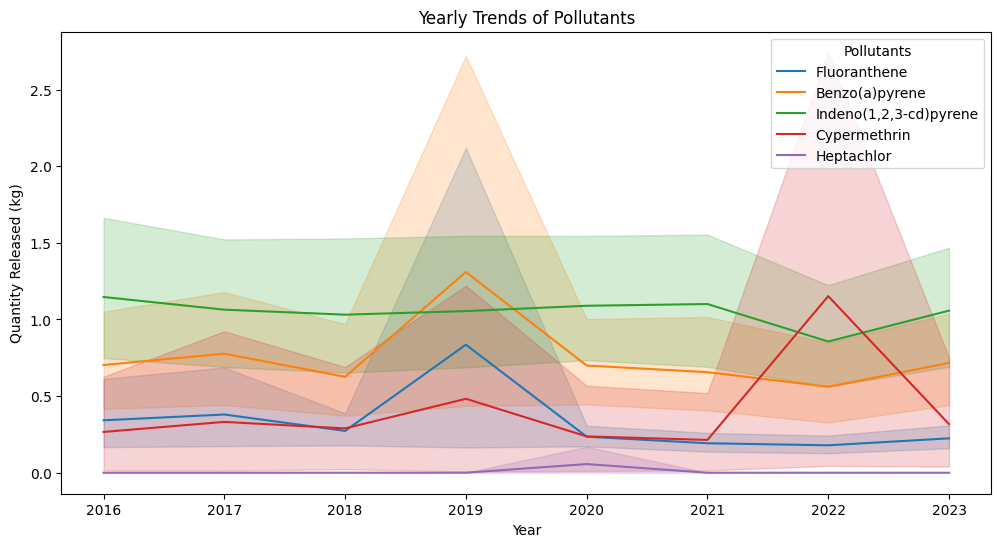

In [12]:
# Visualize results
plt.figure(figsize=(12, 6))
sns.lineplot(data=pollutants_data, x='Year', y='QUANTITY RELEASED (kg)', hue='SUBSTANCE NAME')
plt.title('Yearly Trends of Pollutants')
plt.xlabel('Year')
plt.ylabel('Quantity Released (kg)')
plt.legend(title='Pollutants')
plt.show()


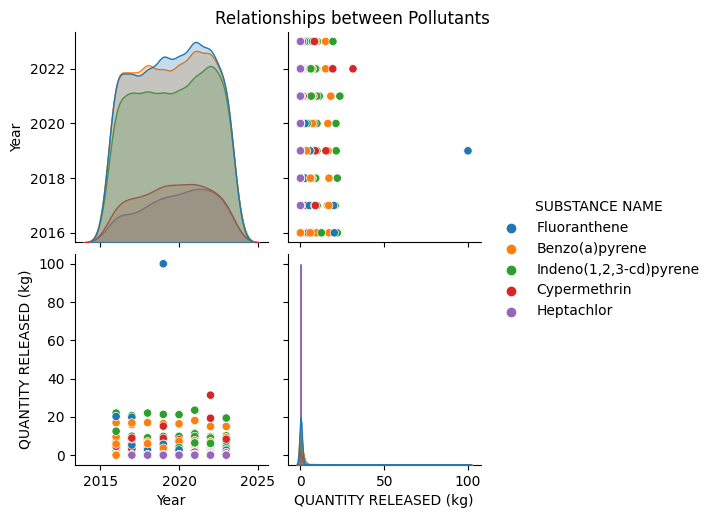

In [13]:
# Visualize results
sns.pairplot(pollutants_data, hue='SUBSTANCE NAME')
plt.suptitle('Relationships between Pollutants', y=1.02)
plt.show()


Text(0, 0.5, 'Density')

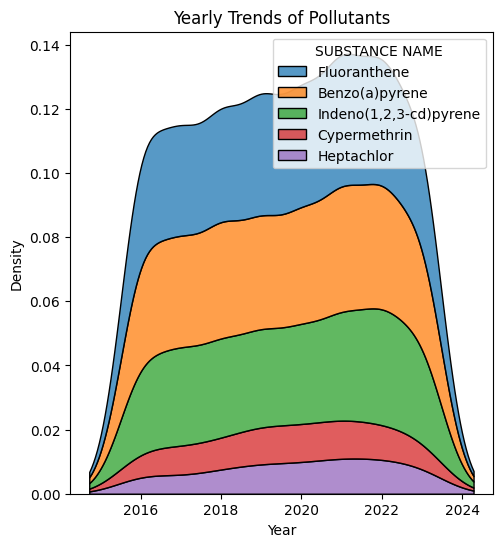

In [23]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns

pollutants_data = combined_data[['SUBSTANCE NAME', 'Year', 'QUANTITY RELEASED (kg)']]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(data=pollutants_data, x='Year', hue='SUBSTANCE NAME', multiple='stack', fill=True)
plt.title('Yearly Trends of Pollutants')
plt.xlabel('Year')
plt.ylabel('Density')


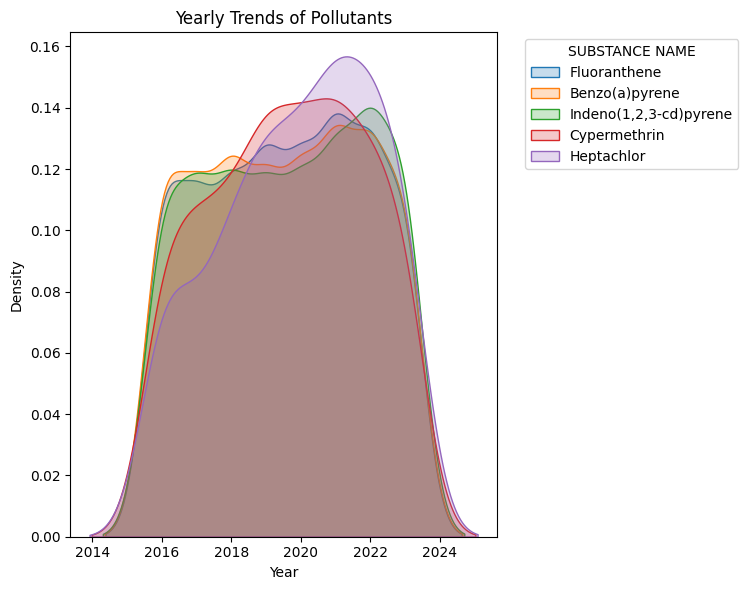

In [29]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns

pollutants_data = combined_data[['SUBSTANCE NAME', 'Year', 'QUANTITY RELEASED (kg)']]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
unique_substances = pollutants_data['SUBSTANCE NAME'].unique()
for substance in unique_substances:
    subset = pollutants_data[pollutants_data['SUBSTANCE NAME'] == substance]
    sns.kdeplot(data=subset, x='Year', label=substance, fill=True)

plt.title('Yearly Trends of Pollutants')
plt.xlabel('Year')
plt.ylabel('Density')

plt.legend(title='SUBSTANCE NAME', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()


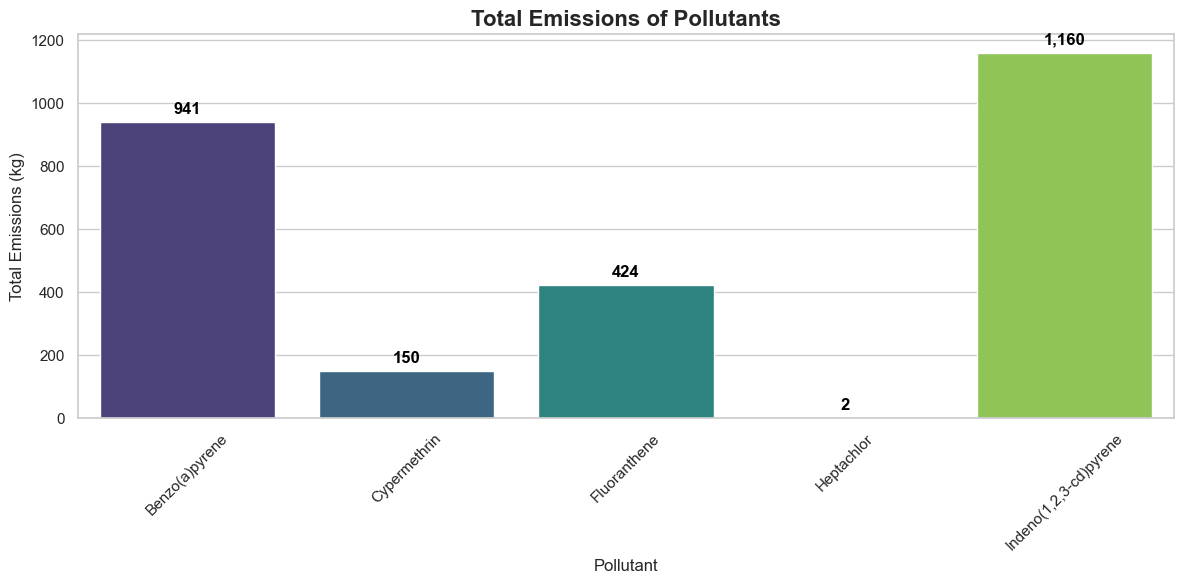

In [32]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

total_emissions = pollutants_data.groupby('SUBSTANCE NAME')['QUANTITY RELEASED (kg)'].sum().reset_index()

plt.figure(figsize=(12, 6))

sns.set(style="whitegrid", palette="Blues")

bar_plot = sns.barplot(x='SUBSTANCE NAME', y='QUANTITY RELEASED (kg)', data=total_emissions, palette='viridis')

plt.title('Total Emissions of Pollutants', fontsize=16, weight='bold')
plt.xlabel('Pollutant', fontsize=12)
plt.ylabel('Total Emissions (kg)', fontsize=12)

for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():,.0f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      fontsize=12, color='black', fontweight='bold',
                      xytext=(0, 9), textcoords='offset points')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


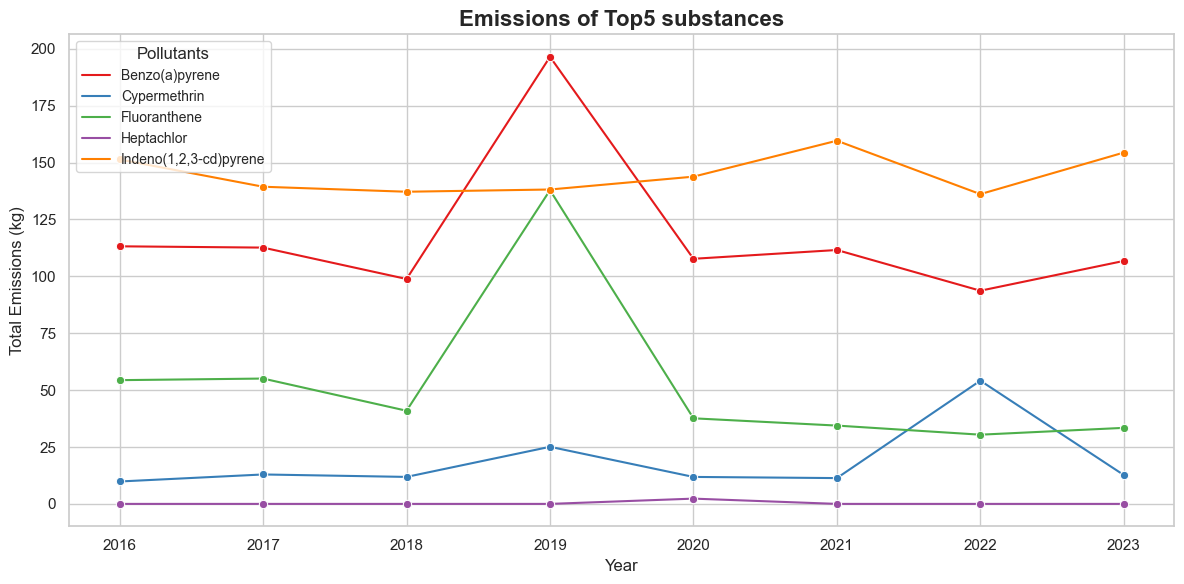

In [36]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

yearly_emissions = pollutants_data.groupby(['SUBSTANCE NAME', 'Year'])['QUANTITY RELEASED (kg)'].sum().reset_index()

plt.figure(figsize=(12, 6))

sns.lineplot(data=yearly_emissions, x='Year', y='QUANTITY RELEASED (kg)', hue='SUBSTANCE NAME', marker='o', palette='Set1')

plt.title('Emissions of Top5 substances', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Emissions (kg)', fontsize=12)

plt.legend(title='Pollutants', fontsize=10, loc='upper left')

plt.tight_layout()
plt.show()
